# Initial Exploration

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import forgi.graph.bulge_graph as fgb
import forgi.visual.mplotlib as fvm

%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 6);

In [2]:
root_dir = "../data/"
train_path = os.path.join(root_dir, 'train.json')
test_path = os.path.join(root_dir, 'test.json')
bpps_dir = os.path.join(root_dir, 'bpps')

In [3]:
train = pd.read_json(train_path, lines=True)
test = pd.read_json(test_path, lines=True)
train.head(3)

,index,id,sequence,structure,predicted_loop_type,signal_to_noise,SN_filter,seq_length,seq_scored,reactivity_error,deg_error_Mg_pH10,deg_error_pH10,deg_error_Mg_50C,deg_error_50C,reactivity,deg_Mg_pH10,deg_pH10,deg_Mg_50C,deg_50C
0,0,id_001f94081,GGAAAAGCUCUAAUAACAGGAGACUAGGACUACGUAUUUCUAGGUA...,.....((((((.......)))).)).((.....((..((((((......,EEEEESSSSSSHHHHHHHSSSSBSSXSSIIIIISSIISSSSSSHHH...,6.894,1,107,68,"[0.1359, 0.20700000000000002, 0.1633, 0.1452, ...","[0.26130000000000003, 0.38420000000000004, 0.1...","[0.2631, 0.28600000000000003, 0.0964, 0.1574, ...","[0.1501, 0.275, 0.0947, 0.18660000000000002, 0...","[0.2167, 0.34750000000000003, 0.188, 0.2124, 0...","[0.3297, 1.5693000000000001, 1.1227, 0.8686, 0...","[0.7556, 2.983, 0.2526, 1.3789, 0.637600000000...","[2.3375, 3.5060000000000002, 0.3008, 1.0108, 0...","[0.35810000000000003, 2.9683, 0.2589, 1.4552, ...","[0.6382, 3.4773, 0.9988, 1.3228, 0.78770000000..."
1,1,id_0049f53ba,GGAAAAAGCGCGCGCGGUUAGCGCGCGCUUUUGCGCGCGCUGUACC...,.....(((((((((((((((((((((((....)))))))))).)))...,EEEEESSSSSSSSSSSSSSSSSSSSSSSHHHHSSSSSSSSSSBSSS...,0.193,0,107,68,"[2.8272, 2.8272, 2.8272, 4.7343, 2.5676, 2.567...","[73705.3985, 73705.3985, 73705.3985, 73705.398...","[10.1986, 9.2418, 5.0933, 5.0933, 5.0933, 5.09...","[16.6174, 13.868, 8.1968, 8.1968, 8.1968, 8.19...","[15.4857, 7.9596, 13.3957, 5.8777, 5.8777, 5.8...","[0.0, 0.0, 0.0, 2.2965, 0.0, 0.0, 0.0, 0.0, 0....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.947, 4.4523, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[4.8511, 4.0426, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.6692, 0.0, 10.9561, 0.0, 0.0, 0.0, 0.0, 0.0..."
2,2,id_006f36f57,GGAAAGUGCUCAGAUAAGCUAAGCUCGAAUAGCAAUCGAAUAGAAU...,.....((((.((.....((((.(((.....)))..((((......)...,EEEEESSSSISSIIIIISSSSMSSSHHHHHSSSMMSSSSHHHHHHS...,8.800,1,107,68,"[0.0931, 0.13290000000000002, 0.11280000000000...","[0.1365, 0.2237, 0.1812, 0.1333, 0.1148, 0.160...","[0.17020000000000002, 0.178, 0.111, 0.091, 0.0...","[0.1033, 0.1464, 0.1126, 0.09620000000000001, ...","[0.14980000000000002, 0.1761, 0.1517, 0.116700...","[0.44820000000000004, 1.4822, 1.1819, 0.743400...","[0.2504, 1.4021, 0.9804, 0.49670000000000003, ...","[2.243, 2.9361, 1.0553, 0.721, 0.6396000000000...","[0.5163, 1.6823000000000001, 1.0426, 0.7902, 0...","[0.9501000000000001, 1.7974999999999999, 1.499..."


In [16]:
def plot_sample(samp=None):
    if samp is None: samp = train.sample(1)
    rna = []
    seq = samp.loc[samp.index[0], 'sequence']
    struct = samp.loc[samp.index[0], 'structure']
    print(struct)
    print(seq)
    fig = plt.figure(figsize=(6,6))
    bg = fgb.BulgeGraph.from_fasta_text(f'>rna1\n{struct}\n{seq}')[0]
    fvm.plot_rna(bg)
    plt.show()

[Sample 0]
.................................................(((((......)))))...(((((((....))))))).....................
GGAAAUACAAUAAUAAAAUAAAAUAAAUAAUAAUAAAUAUAAUAAAUAAAUAUAAAUAAAUAUAUAAAGUUCAUCUUCGGAUGAGCAAAAGAAACAACAACAACAAC


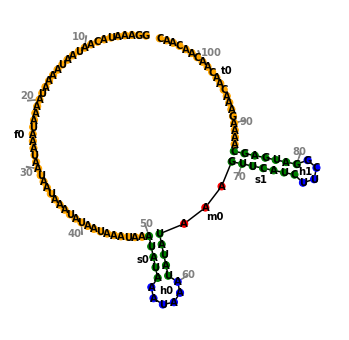

[Sample 1]
....................................................................(((((((....))))))).....................
GGAAAAAGAAAAAGAAAAAGAAAAAGAAAAAGAAAAAGAAAAAGAAAAAGAAAAAGAAAAAGAAAAAGUAUUAUCUUCGGAUAAUAAAAAGAAACAACAACAACAAC


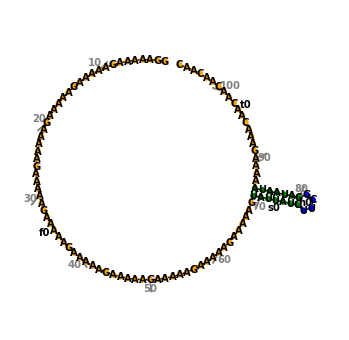

[Sample 2]
.....((.(..((.(((....(((.(((..((........))..)))...)))..))).))..).)).(((((((....))))))).....................
GGAAAGAGUAAUGGUAGGAAAUGAAAUUGAAUGAAAAUAAAUAAGAUAAAUCAAAUUGGUAAAGGUCAGCGCGGAUUCGUCCGCGCAAAAGAAACAACAACAACAAC


/home/schlager/miniconda3/envs/cs273b/lib/python3.6/site-packages/forgi/visual/mplotlib.py:118: RuntimeWarning: invalid value encountered in true_divide
  norm_vec/=ftuv.magnitude(norm_vec)


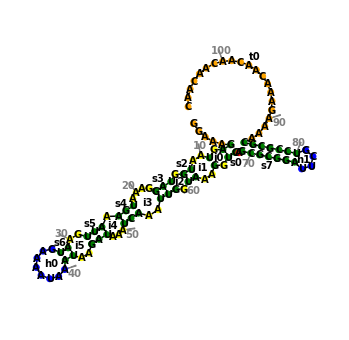

In [21]:
for i in range(3):
    print(f"[Sample {i}]")
    plot_sample()